<a href="https://colab.research.google.com/github/jooharver/PCVK_Eka_Krisna_Ferian_TI-3D_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Akses folder images pada Google Drive Anda dengan kode berikut:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

Mounted at /content/drive


3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan
menghasilkan warna.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan:' ))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simpel tana for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)


Hasil : 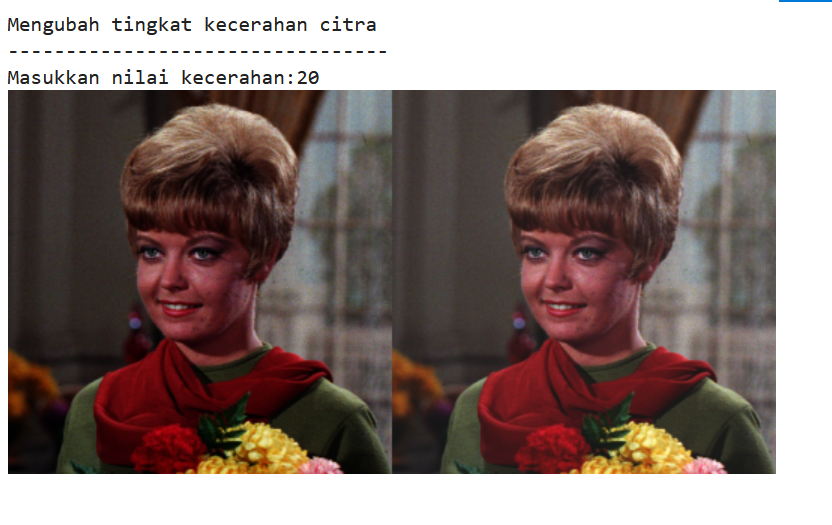

**TUGAS PRAKTIKUM**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

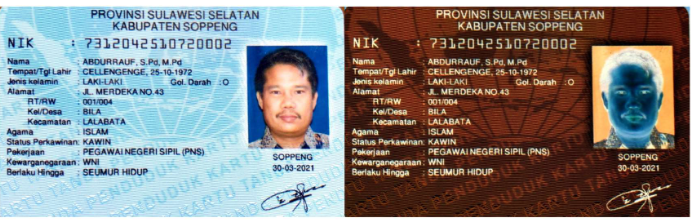




In [ ]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP7.jpeg')
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
ktp_inverse = 255 - ktp_rgb # Invers citra
plt.figure(figsize=(10,5)) # Buat subplot untuk menampilkan dua gambar secara berdampingan
# Gambar pertama (original)
plt.subplot(1, 2, 1)
plt.imshow(ktp_rgb)
plt.title('Original KTP')
plt.axis('off')  # Menonaktifkan sumbu
# Gambar kedua (inverse)
plt.subplot(1, 2, 2)
plt.imshow(ktp_inverse)
plt.title('Inverse KTP')
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


Hasil :
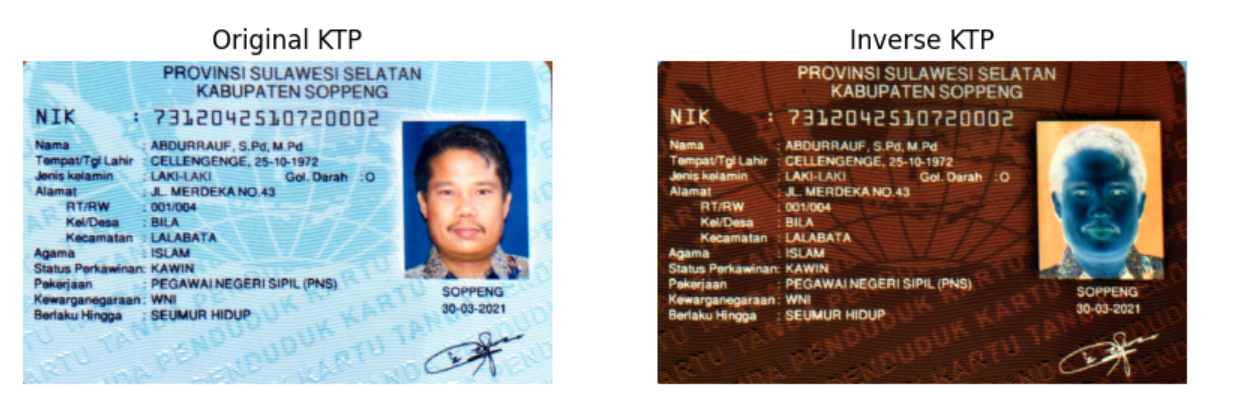

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

# Ambil input brightness dan contrast dari user
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, input bukan angka')
    exit()

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')

# Mengubah kecerahan dan kontras citra pada satu gambar
# alpha = contrast, beta = brightness
filtered_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Menampilkan gambar yang sudah diproses
final_frame = cv.hconcat([original, filtered_image])
cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()


Mengubah kontras dan tingkat kecerahan citra
---------------------------------


Hasil:
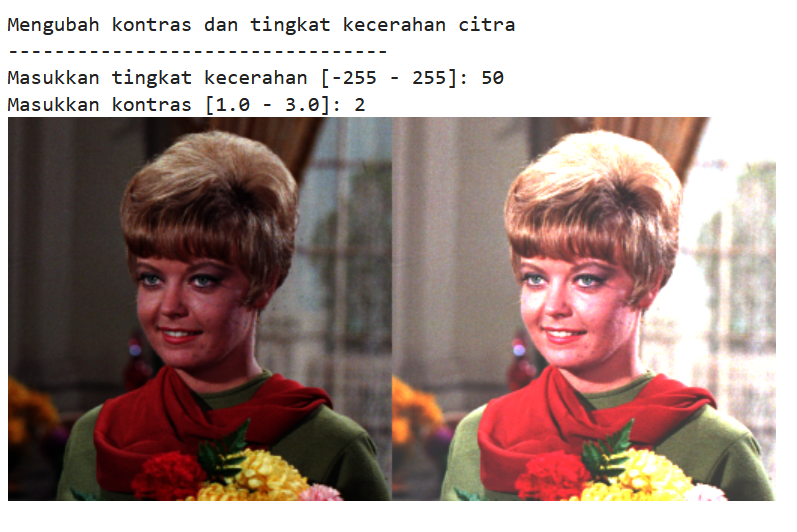

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Mengubah kontras dan melakukan transformasi logaritmik pada citra
------------------------------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 200


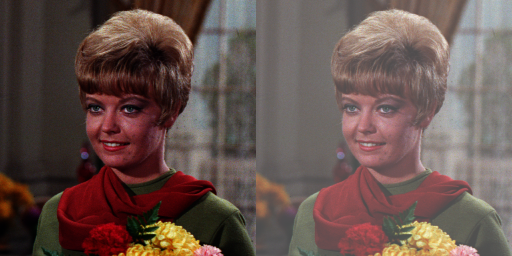

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

print('Mengubah kontras dan melakukan transformasi logaritmik pada citra')
print('------------------------------------------------------------------')

# Ambil input nilai kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
except ValueError:
    print('Error, input bukan angka')
    exit()

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')

# Proses 1: Kontras (nilai kontras otomatis = 2)
contrast = 80.0
contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Proses 2: Transformasi Logaritmik
# Pastikan gambar dalam format float32 agar transformasi log bekerja dengan baik
img_float = np.float32(contrast_image)

# Meningkatkan konstanta c secara signifikan untuk membuat gambar lebih terang
c = 500  # Meningkatkan konstanta c untuk memperterang gambar
log_image = c * (np.log(1 + img_float))

# Konversi kembali ke format 8-bit
log_image = np.uint8(np.clip(log_image, 0, 255))

# Overlay gambar hasil 2 proses dengan gambar asli
overlay_image = cv.addWeighted(original, 0.7, log_image, 0.3, 0)

# Menampilkan gambar asli di sebelah kiri dan overlay hasil di sebelah kanan
final_frame = cv.hconcat([original, overlay_image])

# Menampilkan hasil akhir
cv2_imshow(final_frame)

cv.waitKey(0)
cv.destroyAllWindows()


Hasil:
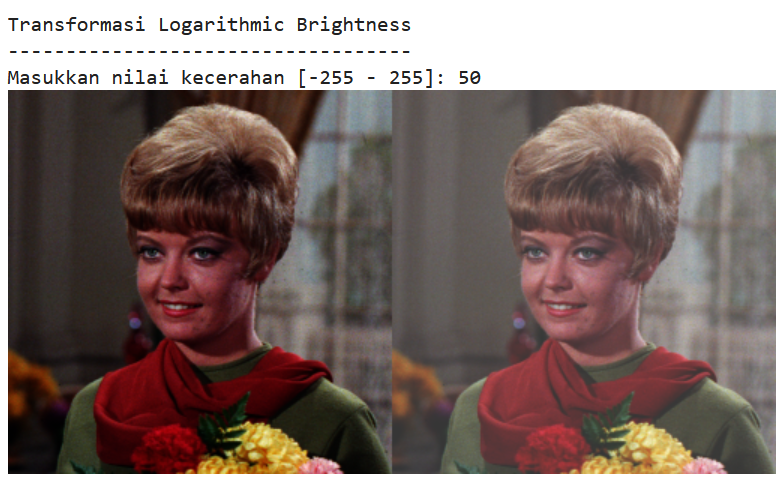

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar KTP
ktp = cv.imread('/content/drive/MyDrive/PCVK/images/KTP7.jpeg')

# Mengubah gambar dari BGR ke RGB
ktp_rgb = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

# Mengubah gambar ke float untuk perhitungan yang lebih akurat
ktp_float = np.float32(ktp_rgb)

# Metode 1: Grayscale menggunakan Averaging
def grayscale_averaging(image):
    return np.mean(image, axis=2).astype(np.uint8)

# Metode 2: Grayscale menggunakan Lightness
def grayscale_lightness(image):
    max_channel = np.max(image, axis=2)
    min_channel = np.min(image, axis=2)
    return ((max_channel + min_channel) / 2).astype(np.uint8)

# Metode 3: Grayscale menggunakan Luminance
def grayscale_luminance(image):
    return (0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]).astype(np.uint8)

# Menerapkan ketiga metode
gray_avg = grayscale_averaging(ktp_float)
gray_light = grayscale_lightness(ktp_float)
gray_luminance = grayscale_luminance(ktp_float)

# Menampilkan gambar asli dan hasil grayscale menggunakan Matplotlib dengan ukuran tampilan yang lebih kecil
plt.figure(figsize=(6, 2))

# Subplot A: Original vs Averaging
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Averaging')
plt.imshow(gray_avg, cmap='gray')
plt.axis('off')

plt.show()

# Subplot B: Original vs Lightness
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Lightness')
plt.imshow(gray_light, cmap='gray')
plt.axis('off')

plt.show()

# Subplot C: Original vs Luminance
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(ktp_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Luminance')
plt.imshow(gray_luminance, cmap='gray')
plt.axis('off')

plt.show()


Hasil :

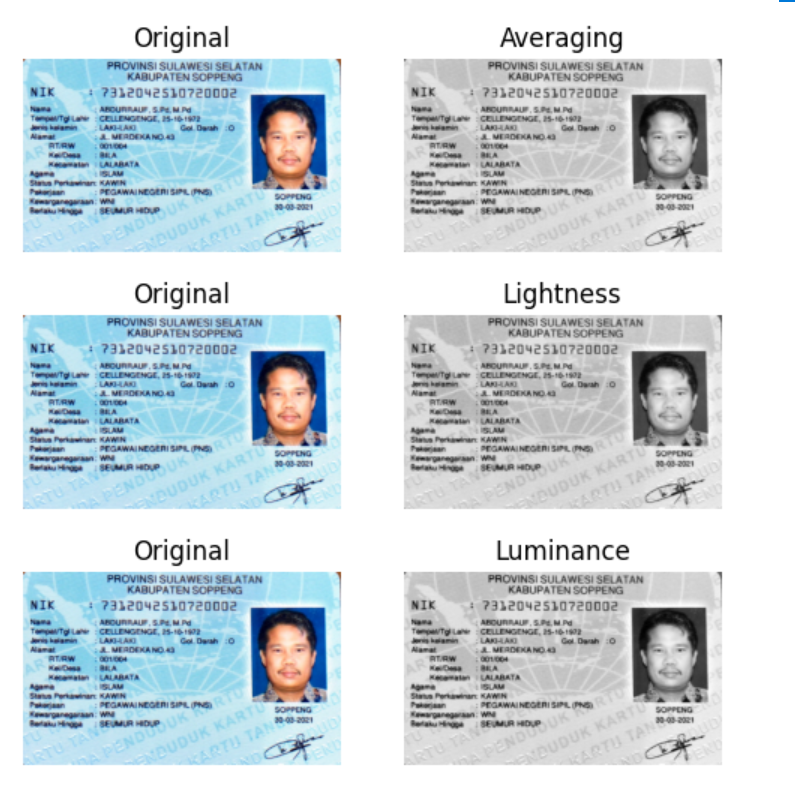

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/images/KTP7.jpeg')

# Mengubah gambar dari BGR ke RGB untuk tampilan yang benar
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mengubah gambar ke grayscale
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Mengubah gambar grayscale ke RGB
image_gray_rgb = cv.cvtColor(image_gray, cv.COLOR_GRAY2RGB)

# Definisikan batas warna biru
lower_blue = np.array([0, 0, 50])  # Biru muda
upper_blue = np.array([160, 160, 255])  # Biru tua

# Definisikan batas warna kulit manusia
lower_skin = np.array([0, 20, 70])
upper_skin = np.array([20, 255, 255])

# Definisikan batas warna bibir (merah muda hingga merah)
lower_lips = np.array([0, 40, 50])
upper_lips = np.array([20, 255, 255])

# Konversi gambar RGB ke HSV untuk deteksi warna kulit dan bibir
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

# Membuat mask untuk warna biru
mask_blue = cv.inRange(image_rgb, lower_blue, upper_blue)

# Membuat mask untuk warna kulit manusia
mask_skin = cv.inRange(image_hsv, lower_skin, upper_skin)

# Membuat mask untuk warna bibir
mask_lips = cv.inRange(image_hsv, lower_lips, upper_lips)

# Menggabungkan mask warna biru, kulit, dan bibir
mask_combined = cv.bitwise_or(mask_blue, mask_skin)
mask_combined = cv.bitwise_or(mask_combined, mask_lips)

# Mengubah mask menjadi 3 channel
mask_rgb = cv.cvtColor(mask_combined, cv.COLOR_GRAY2RGB)

# Terapkan mask untuk mendapatkan area warna biru, kulit, dan bibir dari gambar asli
colored_areas = cv.bitwise_and(image_rgb, mask_rgb)

# Gabungkan area warna biru, kulit, dan bibir dengan gambar grayscale
result = np.where(mask_rgb == 0, image_gray_rgb, colored_areas)

# Menampilkan hasil
plt.figure(figsize=(16, 8))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')

# Menampilkan gambar hasil pemrosesan
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Transformasi')

plt.show()


Hasil
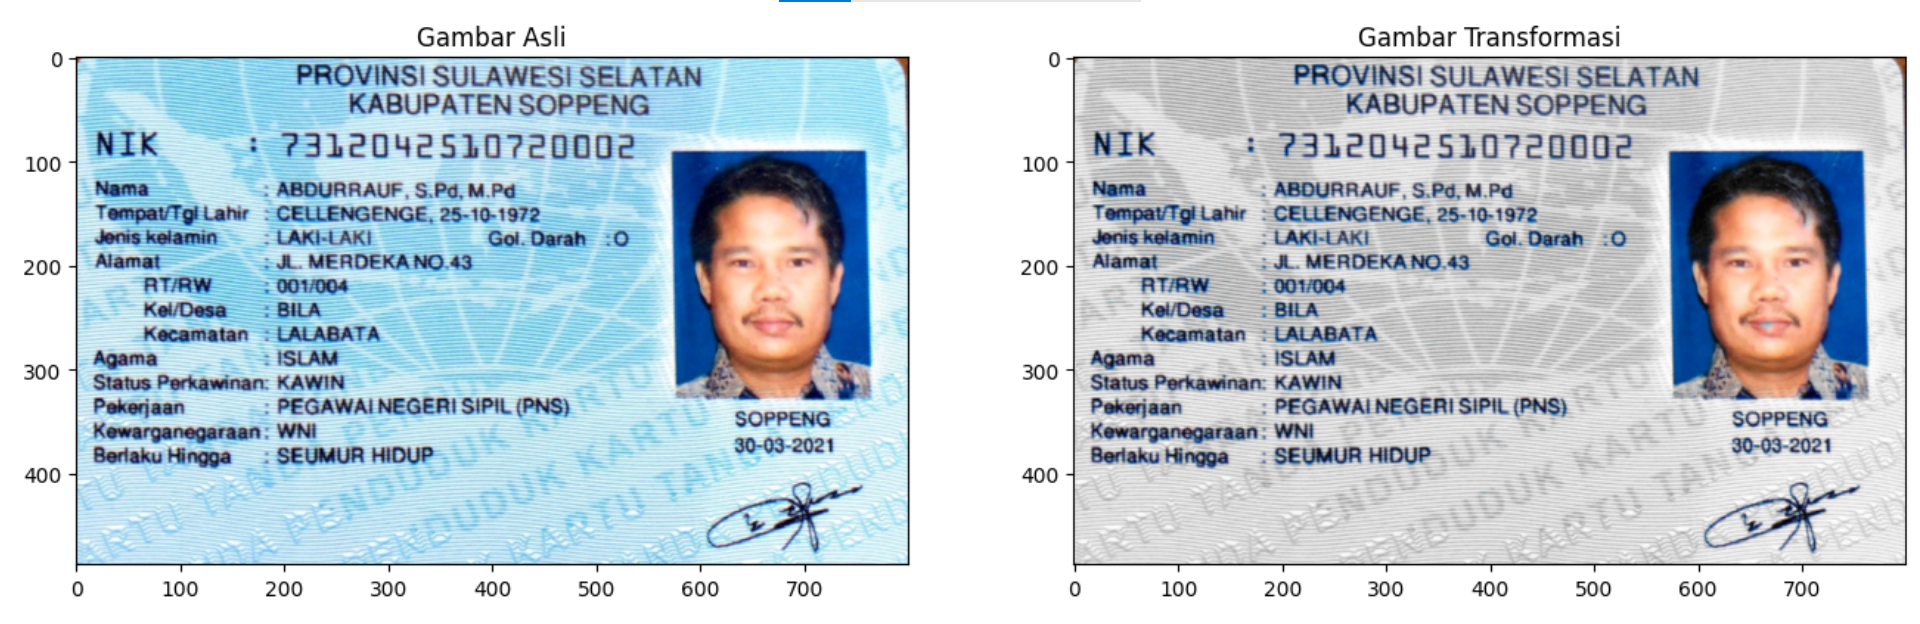